# Тестовое задание для стажеров 


1. Откройте файл с данными и изучите общую информацию (выведите первые 5 строк,проверьте соответствует ли тип данных содержанию столбцов, проверь наличие задублированных строк и другие необходимые показатели для характеристики данных на этапе их загрузки)
<br>

2. Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; 
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
 </b><br>
3. Проведите исследовательский анализ данных:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно и аргументируйте.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
4. Запись данных в xlsx файл:<br>
    - Сохраните обработанную таблицу в xlsx файл, на листе "Общие данные"<br>
    - Создайте лист "Графики" на нем расположите следующие графики:<br> 
        A. "Число выпущенных игр по годам"<br>
        B. "Топ-10 платформ по колличеству проданных игр"<br>
        C. "График колличества продаж по лидерам рынка платформ за 2016 год"<br>
    - Для топ 3 платформ по кол-ву игр в 2016 году создайте отдельные листы с названием этих платформ.<br>
        A. На каждом листе расположите табличную информацию о продажи игр этой платформы за последние 5 лет <br>
        B. График динамики продаж игр по регионам (NA, EU, JP) за 5 лет <br>

In [1]:
!pip install pandas numpy matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    df = pd.read_csv("data.csv")
except Exception as e:
    print("ОПАА: ", e)
    df = pd.read_csv('data.csv', on_bad_lines='skip')
df.head()

ОПАА:  Error tokenizing data. C error: Expected 11 fields in line 950, saw 12



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating;
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E;
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,;
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E;
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,;


#### Ошибка на 950 строке датасета, проблема в том что название игры содержит запятую

In [3]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating;             object
dtype: object

In [4]:
print(df.duplicated().sum())

0


#### Как можем заметить UserScore - object, а так же проблемы с Rating, зато нет явных дубликатов

In [5]:
df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")

In [6]:
df.rename(columns={"Rating;": "Rating"}, inplace=True)
df["Rating"] = np.where(df["Rating"] == ";", np.nan, df["Rating"])
df["Rating"] = df["Rating"].str.rstrip(";")

#### Исправляем эти ошибки и смотрим что у нас получилось

In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score         float64
Rating              object
dtype: object

In [9]:
df["Rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Давайте глянем в какие солбцах есть пропуски и сколько их

In [10]:
for col in df.columns:
    print(col, " ", df[col].isnull().sum())

Name   2
Platform   0
Year_of_Release   267
Genre   2
NA_sales   0
EU_sales   0
JP_sales   0
Other_sales   0
Critic_Score   8496
User_Score   9041
Rating   6690


### Не ожидал я того что поле Name  может быть пустым, без него мы ничего не сможем сделать, так что смело делаем:	

In [11]:
df = df.dropna(subset=["Name"])

Причины пропусков могут быть следующими:
- Отсутствующие данные
- Недоступность данных

##### 'tbd' в столбце с оценкой пользователей: Аббревиатура 'tbd' (to be determined)
- Мы можем рассматривать 'tbd' как пропущенное значение и обработать его так же, как и другие пропуски, например, заменить его на NaN.

Был бы смысл менять значения если бы их было мало в сравнении, но там очень много пропущеных, так что нет

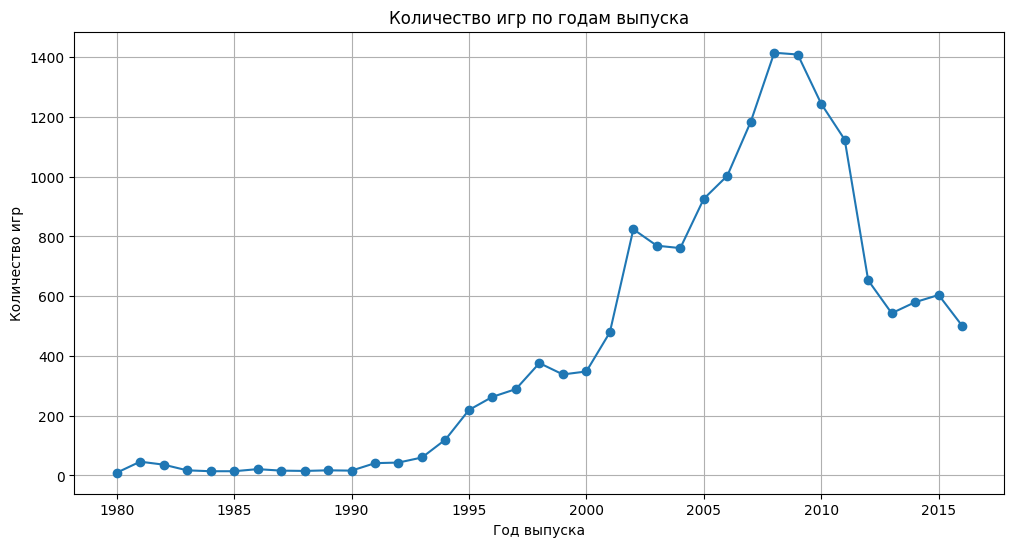

In [12]:
games_per_year = df.groupby('Year_of_Release')['Name'].count()

# Строим график количества игр по годам
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('Количество игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

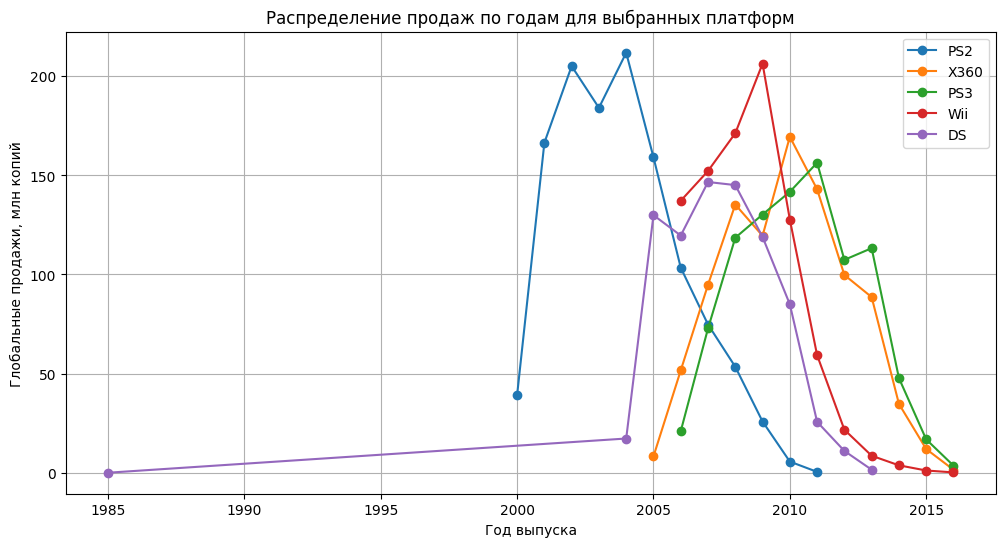

In [13]:
# Группируем данные по платформам и суммируем продажи для каждой платформы
platform_sales = (
    df.groupby("Platform")[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
)

# Выбираем платформы с наибольшими суммарными продажами (например, первые 5)
top_platforms = platform_sales.head(5)

# Выбираем данные только для выбранных платформ
selected_platforms_data = df[df["Platform"].isin(top_platforms.index)]

# Группируем данные по году выпуска игр для каждой выбранной платформы и суммируем продажи
platform_sales_by_year = selected_platforms_data.groupby(
    ["Platform", "Year_of_Release"]
)[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]].sum()

# Строим распределение продаж по годам для каждой платформы
plt.figure(figsize=(12, 6))
for platform in top_platforms.index:
    sales = platform_sales_by_year.loc[platform].sum(axis=1)
    plt.plot(sales.index, sales.values, marker="o", linestyle="-", label=platform)

plt.title("Распределение продаж по годам для выбранных платформ")
plt.xlabel("Год выпуска")
plt.ylabel("Глобальные продажи, млн копий")
plt.legend()
plt.grid(True)
plt.show()

Nintendo DS (яп. ニンテンドーDS Нинтэндо: DS, сокращённо NDS либо DS) — следующее поколение карманных игровых консолей компании Nintendo после Game Boy Advance SP. Консоль была выпущена в 2004 году в Канаде, США и Японии.

Это я про эту фиолетовую линию, к которой явно есть вопросы

Мы видим что жизненный цикл платформы составляет около 5-7 лет
На основании этого можно предположить, что актуальный период должен включать данные с 2010 года, так как к 2010 году многие популярные платформы уже были на пике своей популярности или уже ушли с рынка, а также начинаются новые тенденции и платформы.

Топ-5 платформ по суммарным продажам за актуальный период:
Platform
PS3     586.79
X360    548.92
PS4     314.14
3DS     257.73
Wii     222.37
dtype: float64


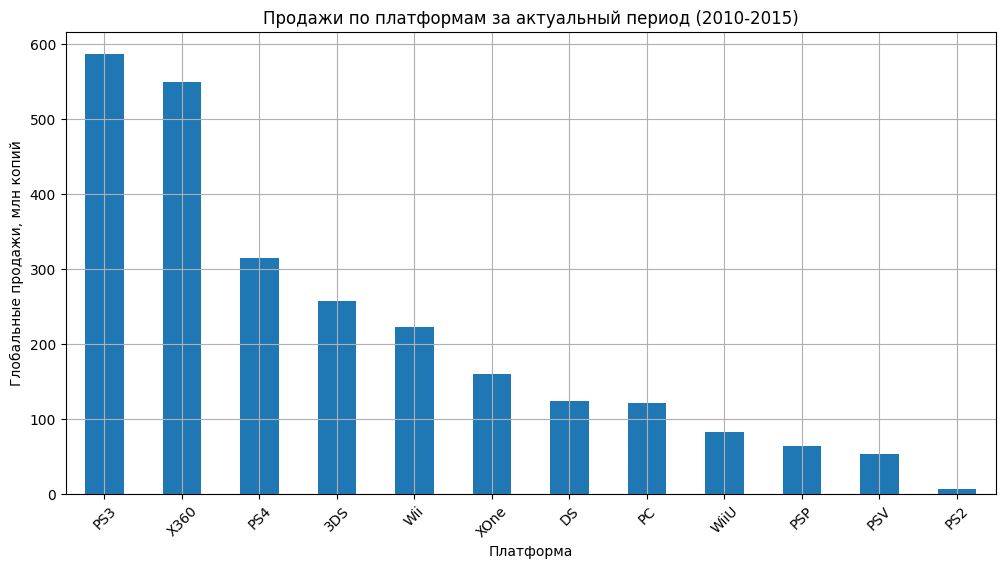

In [14]:
df_actual = df[df["Year_of_Release"] >= 2010]

# Группируем данные по платформам и суммируем продажи для каждой платформы
platform_sales_actual = (
    df_actual.groupby("Platform")[["NA_sales", "EU_sales", "JP_sales", "Other_sales"]]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
)

# Выведем топ-5 платформ по суммарным продажам за актуальный период
print("Топ-5 платформ по суммарным продажам за актуальный период:")
print(platform_sales_actual.head(5))

# Построим график продаж по платформам за актуальный период
plt.figure(figsize=(12, 6))
platform_sales_actual.plot(kind="bar")
plt.title("Продажи по платформам за актуальный период (2010-2015)")
plt.xlabel("Платформа")
plt.ylabel("Глобальные продажи, млн копий")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [18]:
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows

# Создаем новый файл Excel
wb = openpyxl.Workbook()

# Сохраняем обработанную таблицу в xlsx файл на листе "Общие данные"
ws_general = wb.active
ws_general.title = "Общие данные"
for r in dataframe_to_rows(df, index=False, header=True):
    ws_general.append(r)

# Создаем лист "Графики"
ws_charts = wb.create_sheet(title="Графики")
# Создаем график "Число выпущенных игр по годам"
chart_games_per_year = openpyxl.chart.LineChart()
chart_games_per_year.title = "Число выпущенных игр по годам"
chart_games_per_year.x_axis.title = "Год"
chart_games_per_year.y_axis.title = "Число игр"
data = openpyxl.chart.Reference(ws_general, min_col=3, min_row=2, max_row=len(df_actual) + 1)
categories = openpyxl.chart.Reference(ws_general, min_col=3, min_row=2, max_row=len(df_actual) + 1)
chart_games_per_year.add_data(data, titles_from_data=True)
chart_games_per_year.set_categories(categories)
ws_charts.add_chart(chart_games_per_year, "A1")


# Создаем график "Топ-10 платформ по количеству проданных игр"
chart_top_platforms = openpyxl.chart.BarChart()
chart_top_platforms.title = "Топ-10 платформ по количеству проданных игр"
chart_top_platforms.x_axis.title = "Платформа"
chart_top_platforms.y_axis.title = "Количество проданных игр"
data = openpyxl.chart.Reference(ws_general, min_col=3, min_row=2, max_row=11)
categories = openpyxl.chart.Reference(ws_general, min_col=2, min_row=2, max_row=11)
chart_top_platforms.add_data(data, titles_from_data=True)
chart_top_platforms.set_categories(categories)
ws_charts.add_chart(chart_top_platforms, "A20")



# Сохраняем результаты в файл
wb.save("data.xlsx")

Ну выгрузку было немного лень делать